In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
import matplotlib.image as mpimg

In [2]:
digits = datasets.load_digits() # load the dataset
X = digits.data
y = digits.target

In [3]:
X.shape

(1797, 64)

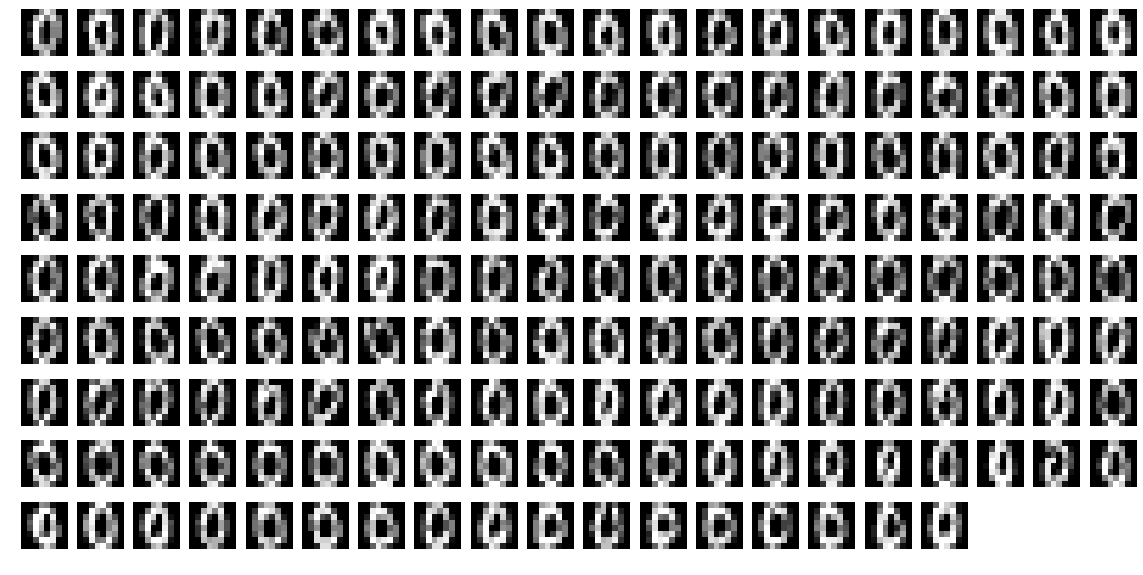

In [5]:


digits = datasets.load_digits() # load the dataset
X = digits.data
y = digits.target

X4 = X[y==0]

plt.figure(figsize=(20,10))
for i in range(1,X4.shape[0]):
    plt.subplot(9,20,i)
    plt.imshow(X4[i].reshape(8,8),cmap='gray')
    plt.axis('off')
    plt.axis('equal')

In [3]:
X4.shape[0]

178

In [4]:
def kmean(X, K):
    
    # your code here..
    
    m,n = X.shape[0], X.shape[1]
    centroids = np.zeros((K,n))
    #random initialization of centroids
    
    for i in range(K):
        centroids[i] = X[np.random.randint(0,m),:]
 
    for f in range(50):
            idx = np.zeros((X.shape[0],1))
            temp = np.zeros((centroids.shape[0],1))


            for i in range(X.shape[0]):
                for j in range(K):
                    dist = X[i,:] - centroids[j,:]
                    length = np.sum(dist**2)
                    temp[j] = length
                idx[i] = np.argmin(temp)+1
                
            #calculate J (cost)
            J=0
            for i in range(m):
                index = int((idx[i]-1)[0])
                J = J + (np.linalg.norm(X[i]-centroids[index]) ** 2)
            
            
            #updating centroid
            centroid_mean = np.zeros((K,n))
            count = np.zeros((K,1))

            for i in range(m):
                index = int((idx[i]-1)[0])
                centroid_mean[index,:]+=X[i,:]
                count[index]+=1


            C=centroid_mean/count
            centroids=C
    
    
    
    
    
    
    return  idx,C, J


In [5]:
def kmeans_repeat(X, K, N):
    
    # (should call 'kmeans' N times and pick the best solution)
    
    for k in range(K):
        best_y, best_C, best_J = 0, 0, float('nan')
        
        while (np.isnan(best_J)):
            best_y, best_C, best_J = kmean(X, k+1)   
        print(np.isnan(best_J))
        for n in range(N-1): # to avoid local minimum
            y, C, J = kmean(X, k+1)
            
            if (J < best_J and J != 0):
                best_y, best_C, best_J = y, C, J
    # your code here.. 
    return best_y, best_C, best_J
#a=X4[2].reshape(32,2)
a=X4.reshape(int(X4.size/2),2)
best_y, best_C, best_J=kmeans_repeat(a, 3, 1)
    

False
False
False


In [6]:
X2_recovered = a.copy()

In [10]:
X4.shape

(178, 64)

In [7]:
for i in range(1,3+1):
    X2_recovered[(best_y==i).ravel(),:] = i

In [11]:
recovered=X2_recovered.reshape(X4.shape[0],64)

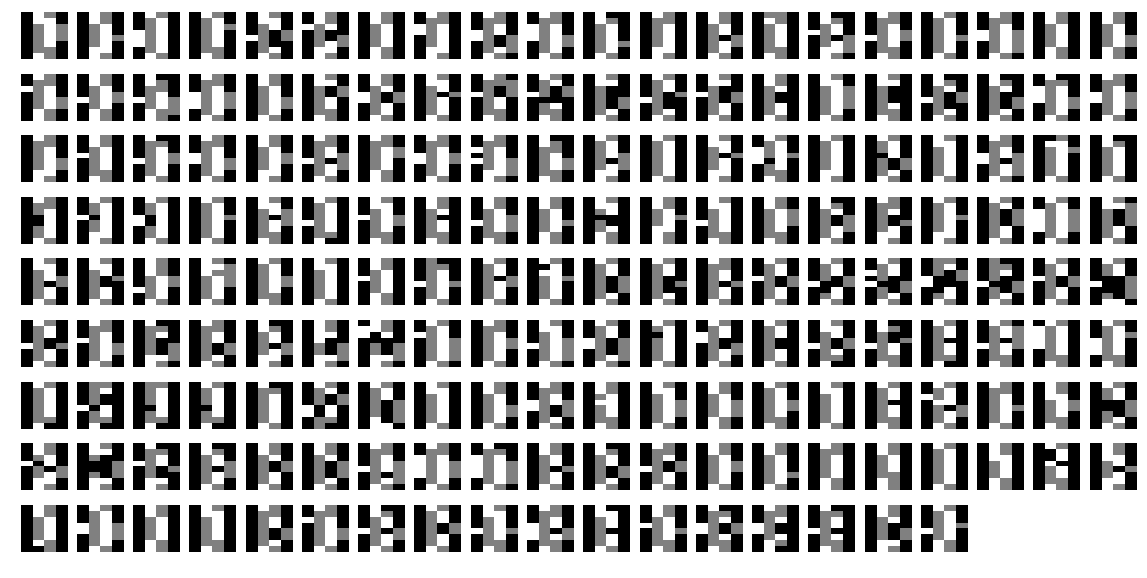

In [14]:
plt.figure(figsize=(20,10))
for i in range(1,X4.shape[0]):
    plt.subplot(9,20,i)
    plt.imshow(recovered[i].reshape(8,8),cmap='gray')
    plt.axis('off')
    plt.axis('equal')
    #plt.scatter(best_C[:,0],best_C[:,1],s=120,marker="x",c="black",linewidth=3)